In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegression
import re

In [2]:
#load the dataset
import pandas as pd
df_tweets=pd.read_csv("tweets.csv",encoding="ISO-8859-1")
df_tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [3]:
df_tweets.tail(5)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
14935,14936,14936,RT @saxenavishakha: Ghost of demonetization re...,False,0,NaN,2017-04-11 14:26:38,False,NaN,8.518037e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",MuzzammilAap,4,True,False
14936,14937,14937,N d modi fans-d true nationalists of the count...,False,0,NaN,2017-04-11 14:19:51,True,NaN,8.518020e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",JusteyAlex,0,False,False
14937,14938,14938,RT @bharat_builder: Lol. Demonetization has fi...,False,0,NaN,2017-04-11 14:19:14,False,NaN,8.518018e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",pavan_sethi,30,True,False
14938,14939,14939,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,False,0,NaN,2017-04-11 14:13:14,False,NaN,8.518003e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Stupidosaur,2,True,False
14939,14940,14940,"@Vidyut B team of BJP. CIA baby. CCTV, EVM but...",False,1,Vidyut,2017-04-11 14:13:06,True,8.516909e+17,8.518003e+17,15199808.0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Stupidosaur,2,False,False


In [4]:
df_tweets.shape

(14940, 16)

In [5]:
df_tweets.columns

Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')

In [6]:
df_tweets.dtypes

Unnamed: 0         int64
X                  int64
text              object
favorited           bool
favoriteCount      int64
replyToSN         object
created           object
truncated           bool
replyToSID       float64
id               float64
replyToUID       float64
statusSource      object
screenName        object
retweetCount       int64
isRetweet           bool
retweeted           bool
dtype: object

In [7]:
df_tweets.isnull().sum()

Unnamed: 0           0
X                    0
text                 0
favorited            0
favoriteCount        0
replyToSN        13838
created              0
truncated            0
replyToSID       14054
id                   0
replyToUID       13838
statusSource         0
screenName           0
retweetCount         0
isRetweet            0
retweeted            0
dtype: int64

In [8]:
df_tweets.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14940.0,7.470500e+03,4.312951e+03,1.000000e+00,3.735750e+03,7.470500e+03,1.120525e+04,1.494000e+04
X,14940.0,7.470500e+03,4.312951e+03,1.000000e+00,3.735750e+03,7.470500e+03,1.120525e+04,1.494000e+04
favoriteCount,14940.0,1.071486e+00,2.875636e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.166000e+03
replyToSID,886.0,8.383798e+17,3.880260e+16,2.209633e+10,8.014600e+17,8.528763e+17,8.540342e+17,8.554541e+17
id,14940.0,8.255716e+17,2.610341e+16,8.010168e+17,8.013058e+17,8.014665e+17,8.535175e+17,8.554729e+17
replyToUID,1102.0,4.302979e+16,1.796912e+17,1.917731e+06,3.914920e+07,1.457888e+08,1.480227e+09,8.542510e+17
retweetCount,14940.0,2.237701e+02,4.117939e+02,0.000000e+00,1.000000e+00,4.000000e+01,1.970000e+02,5.170000e+03


In [9]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     14940 non-null  int64  
 1   X              14940 non-null  int64  
 2   text           14940 non-null  object 
 3   favorited      14940 non-null  bool   
 4   favoriteCount  14940 non-null  int64  
 5   replyToSN      1102 non-null   object 
 6   created        14940 non-null  object 
 7   truncated      14940 non-null  bool   
 8   replyToSID     886 non-null    float64
 9   id             14940 non-null  float64
 10  replyToUID     1102 non-null   float64
 11  statusSource   14940 non-null  object 
 12  screenName     14940 non-null  object 
 13  retweetCount   14940 non-null  int64  
 14  isRetweet      14940 non-null  bool   
 15  retweeted      14940 non-null  bool   
dtypes: bool(4), float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [10]:
#1.Let's clean data

In [11]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)
    #remove url
     
    text = re.sub(r'[https,#,\\,//]', '', text) 
    #Convert to lowercase to maintain consistency
    text = text.lower()
    
    # remove digits
    text = re.sub(r'\d+', '', text)
    
     #Fix %
    text = re.sub(r'%', '', text)
    
    return text

In [12]:
df_tweets.text.apply(lambda x: clean_text(x))

0         rurjewala criical queion wa paytm informed ab...
1         heman_ did you voe on demoneizaion on modi ur...
2         roankar former finsec rbi dy governor cbdt ca...
3         ani_new gurugram (haryana) po office emloyee ...
4         aiacarya reddy wedding mail_oday caroon demon...
                               ...                        
14935     axenaviaka go of demoneizaion reurn wi reor o...
14936    n d modi fand rue naionali of e counry il ink ...
14937     bara_builder lol demoneizaion a fixed a lo li...
14938     suidoaur vidyu b eam of bjp cia baby cctv evm...
14939    vidyu b eam of bjp cia baby cctv evm bu wi vvp...
Name: text, Length: 14940, dtype: object

In [13]:
df_tweets['clean_text']=df_tweets.text.apply(lambda x: clean_text(x))

In [14]:
df_tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,clean_text
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,rurjewala criical queion wa paytm informed ab...
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,heman_ did you voe on demoneizaion on modi ur...
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,roankar former finsec rbi dy governor cbdt ca...
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,ani_new gurugram (haryana) po office emloyee ...
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,aiacarya reddy wedding mail_oday caroon demon...


In [15]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df_tweets['clean_text'] = df_tweets.text.apply(lambda x: clean_text(x))
df_tweets['sentiment_compound_polarity'] = df_tweets.clean_text.apply(lambda x: analyser.polarity_scores(x)['compound'])
df_tweets['sentiment_negative'] = df_tweets.clean_text.apply(lambda x: analyser.polarity_scores(x)['neg'])
df_tweets['sentiment_positive'] = df_tweets.clean_text.apply(lambda x: analyser.polarity_scores(x)['pos'])
df_tweets['sentiment_type']=''
df_tweets.loc[df_tweets.sentiment_compound_polarity>0,'sentiment_type']= 0
df_tweets.loc[df_tweets.sentiment_compound_polarity<0,'sentiment_type']= 1
df_tweets.columns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted',
       'clean_text', 'sentiment_compound_polarity', 'sentiment_negative',
       'sentiment_positive', 'sentiment_type'],
      dtype='object')

In [17]:
df_tweets.shape

(14940, 21)

In [18]:
df_tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,...,statusSource,screenName,retweetCount,isRetweet,retweeted,clean_text,sentiment_compound_polarity,sentiment_negative,sentiment_positive,sentiment_type
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,...,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,rurjewala criical queion wa paytm informed ab...,0.4019,0.000,0.137,0
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,...,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,heman_ did you voe on demoneizaion on modi ur...,0.0000,0.000,0.000,
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,...,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,roankar former finsec rbi dy governor cbdt ca...,-0.2960,0.115,0.000,1
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,...,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,ani_new gurugram (haryana) po office emloyee ...,-0.5574,0.217,0.000,1
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,...,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,aiacarya reddy wedding mail_oday caroon demon...,0.0000,0.000,0.000,


In [19]:
def gen_freq(text):
  #will store the list of words
  word_list=[] 
   #loop over all the tweets and extract words into word_list
  for tw_words in text.split():
        word_list.extend(tw_words)
  #create word frequenciesusing word_list
  word_freq=pd.Series(word_list).value_counts()
  #Print top 20 words
  word_freq[:20]
  return word_freq

word_freq=gen_freq(df_tweets.text.str)
word_freq

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
#News                          1
notes|                         1
https://t.co/ECl4oIzdHA        1
https://t.co/9MjFtLtCtR        1
https://t.co/hwgqjbqgvG        1
Length: 19601, dtype: int64

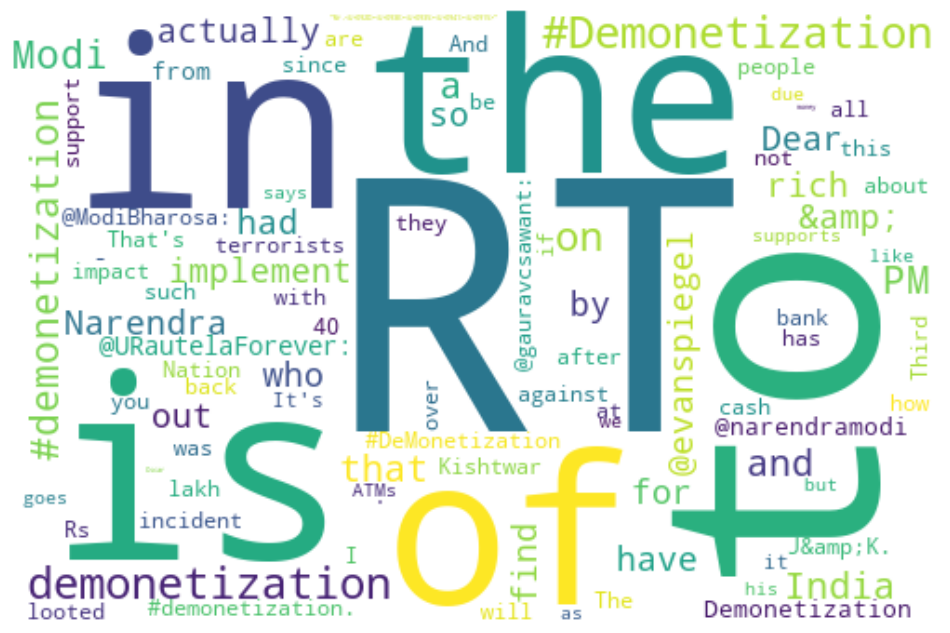

In [20]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=500, height=330, max_words=100, 
        background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc,interpolation='bilinear')#interpolation)
plt.axis('off')
plt.show()

In [21]:
#Import list of stopwards
from wordcloud import STOPWORDS
print(STOPWORDS)

{'to', 'over', 'himself', "doesn't", 'however', 'few', 'his', 'what', 'com', 'did', 'i', 'both', "there's", 'http', 'no', "he's", "when's", 'also', 'again', 'themselves', 'your', 'before', 'cannot', 'my', "can't", "don't", "he'd", 'she', 'therefore', 'are', "that's", 'r', 'while', "they've", 'have', 'there', 'just', "we'd", 'on', 'when', 'been', 'its', 'because', 'further', 'am', 'you', 'k', 'a', "he'll", 'which', 'hers', 'ever', "we'll", 'were', 'during', 'below', 'could', "wasn't", 'in', 'that', 'other', "you'd", 'up', "let's", 'nor', 'whom', 'the', 'of', "haven't", 'off', 'through', 'after', 'like', "it's", "mustn't", "hadn't", 'each', "she'd", 'above', 'having', 'until', 'their', 'very', "wouldn't", 'against', "we've", "who's", 'own', 'was', "they're", 'too', 'those', 'here', 'down', 'once', 'if', 'her', 'them', "you'll", 'theirs', 'by', 'into', 'doing', 'would', 'for', "shan't", 'being', 'has', 'ought', "here's", 'or', 'some', "shouldn't", "isn't", 'is', 'yourself', 'ourselves', "

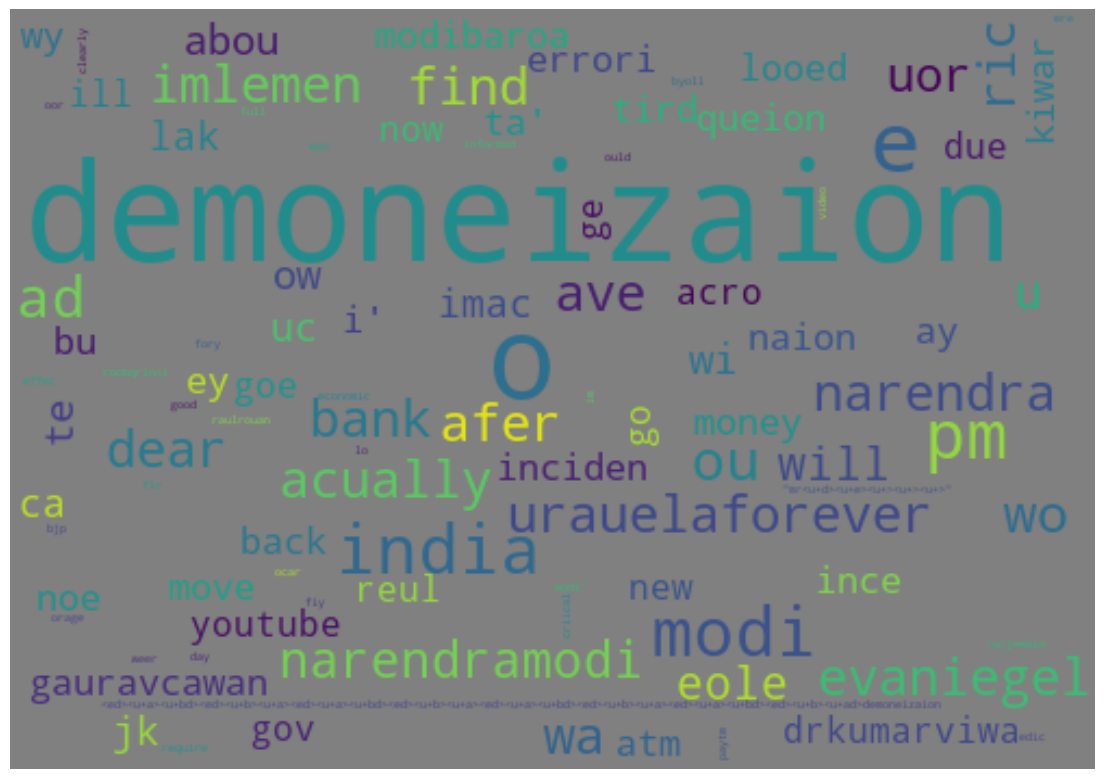

In [22]:
text = df_tweets.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=500, height=350, max_words=100, 
               background_color='gray').generate_from_frequencies(word_freq)

plt.figure(figsize=(14, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

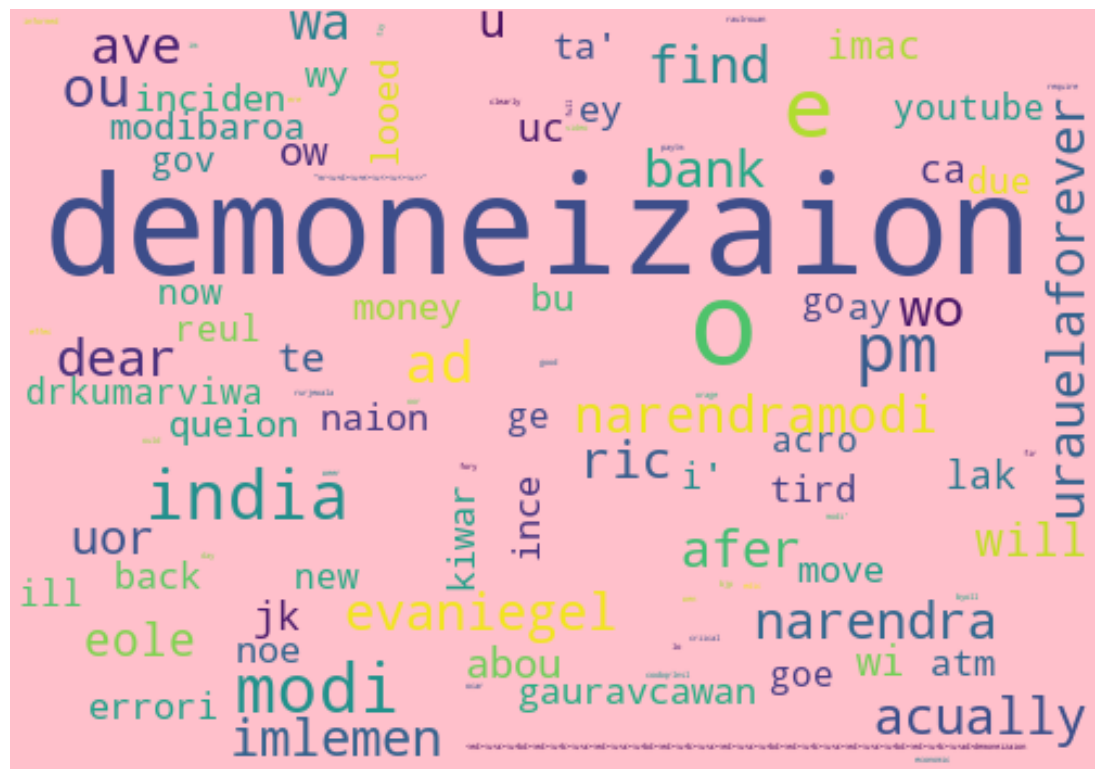

In [23]:
#to remove html you can decrese or increase width and max_words
text = df_tweets.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=500, height=350, max_words=100, 
               background_color='pink').generate_from_frequencies(word_freq)

plt.figure(figsize=(14, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:

#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Create the transform
tfidf = TfidfVectorizer()
#Tokenize and build vocab
tfidf.fit(['clean_text'])


TfidfVectorizer()

In [25]:
X = tfidf.fit_transform(df_tweets['clean_text'])
y = df_tweets['sentiment_type']

In [27]:
X

<14940x12510 sparse matrix of type '<class 'numpy.float64'>'
	with 214450 stored elements in Compressed Sparse Row format>

In [28]:
y

0        0
1         
2        1
3        1
4         
        ..
14935     
14936    1
14937    0
14938     
14939     
Name: sentiment_type, Length: 14940, dtype: object

In [29]:
#X y train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [30]:
X_train.shape,X_test.shape

((10458, 12510), (4482, 12510))

In [31]:
X_train.shape

(10458, 12510)

In [32]:
y_train

879       
1578     0
6440     0
1509     0
1896     1
        ..
5191      
13418    0
5390      
860       
7270     1
Name: sentiment_type, Length: 10458, dtype: object

In [35]:
from sklearn.linear_model import LogisticRegression


In [36]:
 
model=LogisticRegression().fit(X_train,y_train)

TypeError: '<' not supported between instances of 'int' and 'str'

In [33]:
import pickle
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=42,n_jobs=-1,verbose=3,max_iter=300).fit(X_train,y_train)
saved_model=open("saved_model.sav","wb")
pickle.dump(clf,saved_model)
saved_model.close()

NameError: name 'clf' is not defined